# Proyecto: Ecuación de Transferencia Radiativa

## Introducción
La transferencia radiativa está descrita por una ecuación fundamental que describe la variación de la intensidad de la luz en un medio caracterizado por su dispersión, absorción y emisión. La ecuación de transferencia radiativa sirve para describir la dependencia de la intensidad de radiación $I$ con la ubicación propagación del medio. La intensidad se expresa en unidades de potencia (Watts, $W$) por unidad de área ($m^2$) orientada perpendicularmente a la dirección de propagación de la luz, por unidad de ángulo sólido (estereorradianes $sr$ por unidad de banda (en óptica atmosférica: nonometros o micrones en el dominio de longitud de onda. En el plano paralelo de la atmósfera la ubicación de interés está caracterizada por la coordenada $z$ solamente. Un rayo de luz que atraviesa la atmósfera es absorbido o dispersado. 

## Marco teórico

Para describir las propiedades de absorción y dispersión de la atmósfera utilizamos una profundidad óptica adimensional $\tau$ medida desde la parte superior de la atmósfera (TOA) hasta un punto de interés a lo largo de la coordenada $z$, como estamos tratando con la atmósfera el valor de $\tau$ es menor que uno. La profundidad óptica combina la propiedad óptica inherente del medio (eficiencia de extinción) con la distancia física que recorre la luz. Los ángulos cenital $\theta$ y azimutal $\phi$ especifican la dirección. La longitud óptica de un segmento AB en la atmósfera es $\tau/\mu$ con $\mu=-cos(\theta)$, donde el signo menos es una convención causada por direcciones opuestas de los ejes $z$ y $\tau$. Resolver Ecuación de Transferencia Radiativa significa la capacidad de evaluar $I(\tau, \mu, \phi)$ en cada valor del sistema de 3 coordenadas para las propiedades ópticas dadas de la atmósfera con dos condiciones límite: la intensidad de la luz entrante en TOA y la reflexión en el Fondo de la atmósfera (BOA).

En este caso las dispersiones "hacia adelante" y "hacia atrás" corresponden a los ángulos $\varphi=0°$ y $\varphi=180°$ respectivamente. Se entiende como dispersión a la dirección relativa de la propagación de un rayo de luz justo antes de la dispersión. En la figura se ve una representación gráfica de cómo se definen estas disperiones. 

<img src="dispersion.png" style="width: 400px;">

La situación es similar a la de una superficie reflejante, sólo que la componente $z$ del vector que representa al haz de luz cambia el signo dependiendo si la dispersión hacia adelante o hacia atrás. 

En la ecuación de transferencia radiativa, las propiedades ópticas se definen con tres parámetros: $\tau$ que es la profundidad óptica, $\omega_0$ es el albedo de dispersión simple (eficiencia de dispersión y la eficiencia de extinción total) y la función fase $p(\Theta)$, es la función de distribución de probabilidad que depende del ángulo de dispersión $\Theta$. En el caso de $\omega_0$ si es 0 significa que todas las interacciones fueron absorbidas y si es 1 implica que toda la luz fue dispersada. 

El cambio en la intensidad de la luz conforme atraviesa la atmósfera en una dirección dada es la derivada respecto a $\tau$ es decir, el cambio en la intensidad en la profundidad óptica. La redirección de energía a través de la absorción y dispersión a lo largo del camino reduce la intensidad de la luz que viaja, por ello el signo menos en la ecuación diferencial. La dispersión acumulada (cuando se integra) de todas las direcciones sobre la dirección de propagación aumenta la intensidad (segundo y tercer término); todo esto en conjunto nos da la Ecuación de Transferencia Radiativa (ETR):

$$\mu \frac{\partial I(\tau,\mu,\varphi)}{\partial \tau)}=-I(\tau, \mu, \varphi)+\frac{\omega_0}{4\pi}p(\mu,\mu_0,\varphi,\varphi_0)I_0 e^{-\frac{\tau}{\tau_0}} + J(\tau,\mu,\varphi$$

donde 

$$J(\tau,\mu,\phi)=\frac{\omega_0)}{4\pi}\int_{0}^{2}\int_{-1}^1 p(\mu,\mu',\varphi,\varphi')I(\tau,\mu',\varphi')d\mu'd\varphi'$$

es la integral de dispersión. El segundo término en la ecuación describe la dispersión de un rayo solar. $I_0$ es la radiación espectral. La geometría para el caso solar se define por el ángulo cenital solar, entonces $\mu_0=cos(\theta_0$ y el azimutal $\varphi_0$, usualmente se asume $\varphi_0=0$.

Cuando $J=0$ se trata de la dispersión simple, solo se considera una dirección. Mientras que si el medio es no dispersivo, $\omega_0=0$ los dos últimos términos son cero y se reduce a una ecuación diferencial de primer orden y su solución es la ley de atenuación de Bougher-Lambert-Beer.  

En este proyecto se analiza la dispersión de luz solar monocromática en un plano paralelo a la atmósfera de la Tierra delimitado en la parte de abajo por una superficie reflejante. Además consideramos una atmósfera uniforme, sin polarización, y la superficie reflejante es uniforme. 

Para simplificar un poco, vamos a tomar algunas consideraciones: asumimos que la atmósfera es plana (unidimensional), no emisora y homogenea. También despreciamos la polarización de la luz, de tal manera que la transferencia radiativa es escalar.


### Condiciones de frontera

La solución de la RTE necesita dos condiciones de fronte; la luz solar entrante en la parte superior de la atmósfera y la superficie reflejante en el fondo. La primer condición es cero. Mientras que la segunda depende de las propiedades reflectivas de la superficie y la solución de ETR en la superficie. Esta condición se impone a la radiación reflejada, $\mu=\mu_<0$ en el nivel base $\tau_0$. Entonces dos cosas contribuyen a la radiación que se refleja en el fondo: la reflexión del rayo solar y la reflexión de la radiación difura que viene de la atmósfera. 

## Programa

### Nodos y pesos Gaussianos

El cálculo de nodos gaussianos $x_j$ y pesos $w_j$ se utiliza para integrar númericamente, en este caso la $J$ que se usa cuando la dispersión no es simple. Se puede aproximar la integral de $f(x)$ como:

$$\int_{-1}^1f(z)dx\approx \sum_{j=1}^{2N}f(x_j)$$

El código que los calcula es el siguiente:



In [97]:
import numpy as np
from numba import jit
@jit(nopython=True, cache=True)
def gauss_weights(x1, x2, n):
    cte = 3.0e-14
    x = np.zeros(n)
    w = np.zeros(n)
    m = int((n+1)/2)
    yxm = 0.5*(x2 + x1)
    yxl = 0.5*(x2 - x1)
    for i in range(m):
        yz = np.cos(np.pi*(i + 0.75)/(n + 0.5))
        while True:
            yp1 = 1.0
            yp2 = 0.0
            for j in range(n):
                yp3 = yp2
                yp2 = yp1
                yp1 = ((2.0*j + 1.0)*yz*yp2 - j*yp3)/(j+1)
            ypp = n*(yz*yp1 - yp2)/(yz*yz - 1.0)
            yz1 = yz
            yz = yz1 - yp1/ypp
            if (np.abs(yz - yz1) < cte):
                break 
        x[i] = yxm - yz*yxl
        x[n-1-i] = yxm + yxl*yz
        w[i] = 2.0*yxl/((1.0 - yz*yz)*ypp*ypp)
        w[n-1-i] = w[i]
    return x, w

gauss_weights(-1.0,1.0,10)

(array([-0.97390653, -0.86506337, -0.67940957, -0.43339539, -0.14887434,
         0.14887434,  0.43339539,  0.67940957,  0.86506337,  0.97390653]),
 array([0.06667134, 0.14945135, 0.21908636, 0.26926672, 0.29552422,
        0.29552422, 0.26926672, 0.21908636, 0.14945135, 0.06667134]))

En el código a diferencia de la ecuación antes escrita, el número de nodos es $N$ en lugar de $2N$ porque estamos considerando una hemiesfera.

### Función base: polinomios de Legendre

Debido a su ortogonalidad los polinomios de Legendre se usan como función base para las simulaciones númericas de la transferencia radiativa, depende del tipo de problema se usan los policones ordinario, asociados o generalizados.

**Polinomios ordinarios de Legendre**

Los polinomios ordinarios de Legendre están definidos en el intervalo $x=[-1:1]$. Se usan para soluciones que solo dependen de un ángulo, por ejemplo para el caso en que flujos e intensidad son azimutalmente independiente; es decir, cuando la dirección solar o de visión, o ambas, coinciden
con la componente normal local.

A continuación se muestra el código para los polinomios de Legendre:


In [2]:
def pol_leg(x, kmax):
    nk = kmax+1
    pk = np.zeros(nk)
    if kmax == 0:
        pk[0] = 1.0
    elif kmax == 1:
        pk[0] = 1.0
        pk[1] = x
    else:
        pk[0] = 1.0
        pk[1] = x
        for ik in range(2, nk):
            pk[ik] = (2.0 - 1.0/ik)*x*pk[ik-1]-(1.0 - 1.0/ik)*pk[ik-2]
    return pk


Donde se utiliza la relación de recurrencia para los polinomios de $k>1$.

**Polinomios asociados de Legendre**

Estos polinomios tienen dos graods de libertad, $k$ y $m$, cuando $m=0$ es el caso ordinario. Aunque existe una función de recurrencia:

$$(k-m)P_k^m(x)=(2k-1)xP_{k-1}^m(x)-(k+m-1)P_{k_2}^m(X)$$

Para escribir el código, sin embargo se utilza los Polinomios seminormalizados de Schmidt:

$$Q_k^m(x)=(-1)^m\sqrt{\frac{(k-m)!}{(k+m)!}P_k^m}$$

Que también son ortonormales:

$$\int_{-1}^1Q_k^m(x)Q_{l}^m(x)=\frac{2}{2k+1}\delta_{kl}$$

El código para estos polinomios es el siguiente:


In [3]:
def pol_sch (m, x, kmax):
    nk = kmax+1
    qk = np.zeros(nk)
    # k=m: Qmm(x)=c0*[sqrt(1-x2)]^m
    c0 = 1.0
    for ik in range(2, 2*m+1, 2):
        c0 = c0 - c0/ik
    qk[m] = np.sqrt(c0)*np.power(np.sqrt( 1.0 - x*x ), m)
    # Q{k-1}m(x), Q{k-2}m(x) -> Qkm(x)
    m1 = m*m - 1.0
    m4 = m*m - 4.0
    for ik in range(m+1, nk):
        c1 = 2.0*ik - 1.0
        c2 = np.sqrt((ik + 1.0)*(ik - 3.0) - m4)
        c3 = 1.0/np.sqrt((ik + 1.0)*(ik - 1.0) - m1)
        qk[ik] = (c1*x*qk[ik-1] - c2*qk[ik-2])*c3
    return qk

## Solución: aproximación de dispersión simple

La aproximación de dispersión simple es una importante solución de la Ecuación de Transferencia Radiativa (ETR), y la ecuación diferencial que la describe es:

$$\mu \frac{\partial I_1(\tau,\mu,\varphi)}{\partial \tau)}=-I_1(\tau, \mu, \varphi)+\frac{\omega_0}{4\pi}p(\mu,\mu_0,\varphi,\varphi_0)I_0 e^{-\frac{\tau}{\tau_0}} $$

donde el 1 denota que es dispersión simple. Está ecuación solo contiene la radiación de trayectoria, ya que el rebote de la luz entre la atmósfera y la superficie requiere dos dispersiones.

La superficie contribuye a la dispersión simple solo con la reflexión directa:

$$I_1^{Atm+Sup}=I_1+I_1^{Sup}=I_1+I_0e^{\tau_0/\mu_-}\exp{-\tau_0(\mu_0)}$$

Entonces tenemos una ecuación diferencial ordinaria. La solución debe satisfacer las dos condiciones de frontera que se mencionaron anteriormente. Entonces la solución es diferente cuando es ascendiente, $\mu<0$ y descendiente $\mu>0$:

$$I_1(\tau,\mu,\varphi)=I_1(\tau,\Theta)=\frac{\omega_0}{4\pi}p(\Theta)\begin{cases}
\frac{\mu_0}{\mu_0-\mu} \left( e^{-\frac{\tau}{\mu_0}}-e^{\frac{\tau_0-\tau}{\mu}-\frac{\tau_0}{\mu_0}}\right) & \text{  } \mu<0 \\ 
 \frac{\mu_0}{\mu_0-\mu} \left( e^{-\frac{\tau}{\mu_0}}-e^{-\frac{\tau_0}{\mu_0}}\right) & \text{  } \mu>0, \mu\neq \mu_0 \\ 
 \frac{\tau}{\mu_0}e^{-\frac{\tau}{\mu_0}}& \text{  } \mu=mu_0\end{cases}$$

Si escribimos $p(\Theta)=p(\tau,\Theta)$ la atmósfera se covierte en varias capas homogéneas $\delta \tau$ y se hace el cálculo de dispersión para cada capa, asumiendo $\tau_0=\Delta \tau$ y $\tau=0$ o $\Delta \tau$ para las soluciones de dispersión hacia arriba o hacia abajo, entonces la solución se convierte en:

$$I_1(\tau,\Theta)=\frac{\omega_0}{4\pi}p(\Theta)\begin{cases}
\frac{\mu_0}{\mu_0-\mu} \left( 1-e^{\frac{\tau_0-\tau}{\mu}-\frac{\tau_0}{\mu_0}}\right) & \text{  } \mu<0 \\ 
 \frac{\mu_0}{\mu_0-\mu} \left( e^{-\frac{\Delta \tau}{\mu_0}{}}-e^{-\frac{\Delta \tau}{\mu}}\right) & \text{  } \mu>0, \mu\neq \mu_0 \\ 
 \frac{\Delta \tau}{\mu_0}e^{-\frac{\Delta \tau}{\mu_0}}& \text{  } \mu=mu_0\end{cases}$$

Entonces se calcula la contribución de capa a las capas debajo de ella, y el rayo solar se debe atenuar. La figura muestra el suceso:

Haciendo un bucle sobre todas las $\Delta\tau$ capas se acumula la contribución de capa y se obtiene la solución de dispersión simple en todos los niveles de la atmósfera que se puede usar este mismo "truco" para dispersión múltiple.

En este caso se hace la expansión de la función fase en función de los polinomios de Legendre usando el productor punto, denotado con np.dot, aunque no es necesario este paso porque aquí el coseno del ángulo de dispersión no es una variable; pero en el caso de dispersión múltiple es un paso necesario.


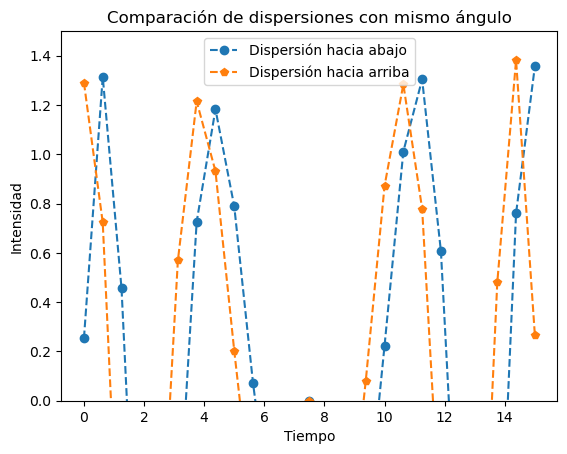

In [28]:
import matplotlib.pyplot as plt

def dis_unica_up(mu, mu0, azr, tau0, xk):
    nk = len(xk)
    smu = np.sqrt(1.0 - mu*mu)
    smu0 = np.sqrt(1.0 - mu0*mu0)
    nu = mu*mu0 + smu*smu0*np.cos(azr)
    p = np.zeros_like(nu)
    for inu, nui in enumerate(nu):
        pk = pol_leg(nui, nk-1)
        p[inu] = np.dot(xk, pk)
    mup = -mu
    I1up = p*mu0/(mu0 + mup)*(1.0 - np.exp(-tau0/mup -tau0/mu0))
    return I1up

def dis_unica_down(mu, mu0, azr, tau0, xk):
    nk = len(xk)
    tiny = 1.0e-8 
    smu = np.sqrt(1.0 - mu*mu)
    smu0 = np.sqrt(1.0 - mu0*mu0)
    nu = mu*mu0 + smu*smu0*np.cos(azr)
    p = np.zeros_like(nu)
    for inu, nui in enumerate(nu):
        pk = pol_leg(nui, nk-1)
        p[inu] = np.dot(xk, pk)
    if np.abs(mu - mu0).any() < tiny:
        I1dn = p*tau0*np.exp(-tau0/mu0)/mu0
    else:
        I1dn = p*mu0/(mu0 - mu)*(np.exp(-tau0/mu0) - np.exp(-tau0/mu))
    return I1dn

mu1=-0.02
mu2=0.02
azd = np.linspace(0,180,25)

mu0=np.cos(np.radians(azd))
azr=130
tau0=0.05
xk=np.linspace(0,15,25)

up=dis_unica_up(mu1,mu0,azr,tau0,xk)
down=dis_unica_down(mu2,mu0,azr,tau0,xk)

plt.plot(xk,down,"o--",label="Dispersión hacia abajo")
plt.plot(xk,up,"p--",label="Dispersión hacia arriba")
plt.ylim(0,1.5)
plt.xlabel("Tiempo")
plt.ylabel("Intensidad")
plt.title("Comparación de dispersiones con mismo ángulo")
plt.legend()
plt.show()


Vemos que cuando el ángulo es el mismo solo hay un pequeño desfase en sus máximos pero tienen igual el mismo comportamiento.

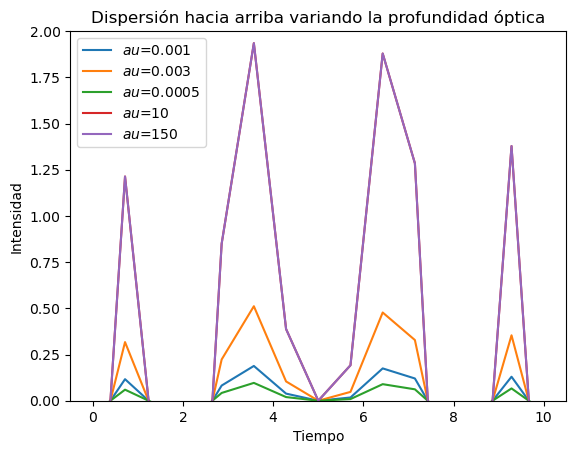

In [90]:
mu1=-0.01
azd = np.linspace(0,180,15)

mu0=np.cos(np.radians(azd))
azr=70
tau1=0.001
tau2=0.003
tau3=0.0005
tau4=10
tau5=150

xk=np.linspace(0,10,15)

up1=dis_unica_up(mu1,mu0,azr,tau1,xk)
up2=dis_unica_up(mu1,mu0,azr,tau2,xk)
up3=dis_unica_up(mu1,mu0,azr,tau3,xk)
up4=dis_unica_up(mu1,mu0,azr,tau4,xk)
up5=dis_unica_up(mu1,mu0,azr,tau5,xk)

plt.plot(xk,up1,label="$\tau$=0.001")
plt.plot(xk,up2,label="$\tau$=0.003")
plt.plot(xk,up3,label="$\tau$=0.0005")
plt.plot(xk,up4,label="$\tau$=10")
plt.plot(xk,up5,label="$\tau$=150")
plt.title("Dispersión hacia arriba variando la profundidad óptica")
plt.ylim(0,2.0)
plt.xlabel("Tiempo")
plt.ylabel("Intensidad")
plt.legend()
plt.show()



Al variar la profundidad óptica entre más grande la intensidad es mayor, ya que es más opaco, además todos los máximos ocurren al mismo tiempo.

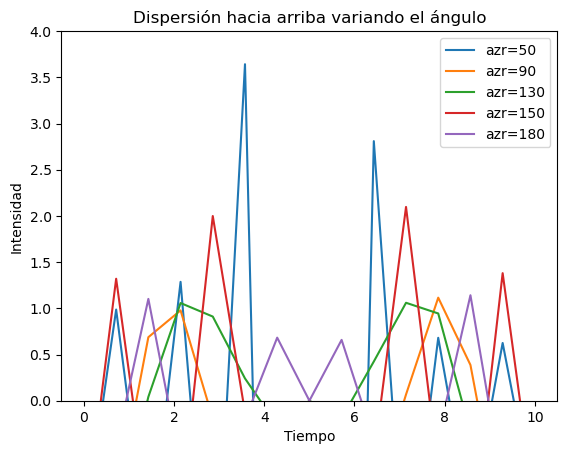

In [44]:
mu=-0.01
azd = np.linspace(0,180,15)

mu0=np.cos(np.radians(azd))
azr1=50
azr2=90
azr3=130
azr4=150
azr5=180

tau0=0.05
xk=np.linspace(0,10,15)

up1=dis_unica_up(mu,mu0,azr1,tau0,xk)
up2=dis_unica_up(mu,mu0,azr2,tau0,xk)
up3=dis_unica_up(mu,mu0,azr3,tau0,xk)
up4=dis_unica_up(mu,mu0,azr4,tau0,xk)
up5=dis_unica_up(mu,mu0,azr5,tau0,xk)

plt.plot(xk,up1,label="azr=50")
plt.plot(xk,up2,label="azr=90")
plt.plot(xk,up3,label="azr=130")
plt.plot(xk,up4,label="azr=150")
plt.plot(xk,up5,label="azr=180")
plt.title("Dispersión hacia arriba variando el ángulo")
plt.ylim(0,4.0)
plt.xlabel("Tiempo")
plt.ylabel("Intensidad")
plt.legend()
plt.show()



En este caso que el parámetro que se varia es el ángulo los máximos de intensidad no ocurren al mismo tiempo.

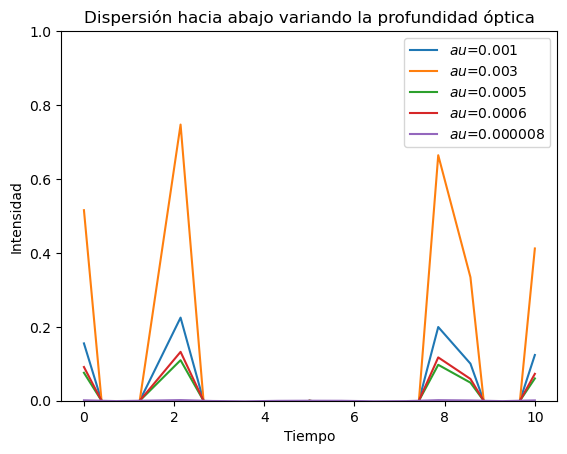

In [95]:
mu1=-0.01
azd = np.linspace(0,180,15)

mu0=np.cos(np.radians(azd))
azr=70
tau1=0.001
tau2=0.003
tau3=0.0005
tau4=0.0006
tau5=0.000008
xk=np.linspace(0,10,15)

d1=dis_unica_down(mu1,mu0,azr,tau1,xk)
d2=dis_unica_down(mu1,mu0,azr,tau2,xk)
d3=dis_unica_down(mu1,mu0,azr,tau3,xk)
d4=dis_unica_down(mu1,mu0,azr,tau4,xk)
d5=dis_unica_down(mu1,mu0,azr,tau5,xk)

plt.plot(xk,d1,label="$\tau$=0.001")
plt.plot(xk,d2,label="$\tau$=0.003")
plt.plot(xk,d3,label="$\tau$=0.0005")
plt.plot(xk,d4,label="$\tau$=0.0006")
plt.plot(xk,d5,label="$\tau$=0.000008")
plt.title("Dispersión hacia abajo variando la profundidad óptica")
plt.ylim(0,1.0)
plt.xlabel("Tiempo")
plt.ylabel("Intensidad")
plt.legend()
plt.show()



En este caso no permite valores grandes para la profundidad óptica, y en el caso de valores muy pequeños la intensidad se va a cero.

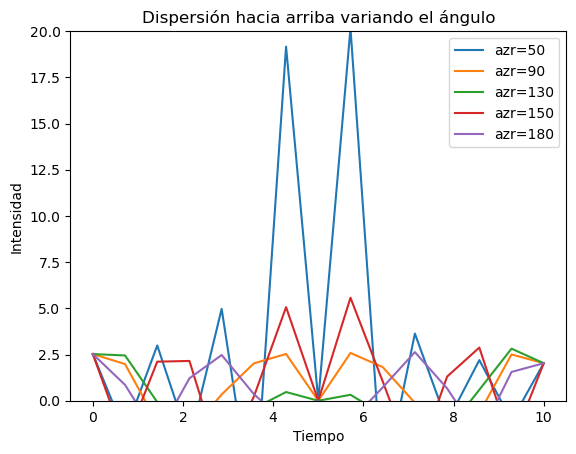

In [61]:
mu=-0.01
azd = np.linspace(0,180,15)

mu0=np.cos(np.radians(azd))
azr1=50
azr2=90
azr3=130
azr4=150
azr5=180

tau0=0.01
xk=np.linspace(0,10,15)

d1=dis_unica_down(mu,mu0,azr1,tau0,xk)
d2=dis_unica_down(mu,mu0,azr2,tau0,xk)
d3=dis_unica_down(mu,mu0,azr3,tau0,xk)
d4=dis_unica_down(mu,mu0,azr4,tau0,xk)
d5=dis_unica_down(mu,mu0,azr5,tau0,xk)

plt.plot(xk,d1,label="azr=50")
plt.plot(xk,d2,label="azr=90")
plt.plot(xk,d3,label="azr=130")
plt.plot(xk,d4,label="azr=150")
plt.plot(xk,d5,label="azr=180")
plt.title("Dispersión hacia arriba variando el ángulo")
plt.ylim(0,20.0)
plt.xlabel("Tiempo")
plt.ylabel("Intensidad")
plt.legend()
plt.show()



Al igual que en el caso anterior, los máximos no ocurren al mismo tiempo.